In [ ]:
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 2.4 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 47 kB 3.3 MB/s 
     |████████████████████████████████| 131 kB 11.2 MB/s 
     |████████████████████████████████| 61 kB 299 kB/s 
     |████████████████████████████████| 1.6 MB 32.9 MB/s 
     |████████████████████████████████| 11.2 MB 2.8 MB/s 
     |████████████████████████████████| 960 kB 37.7 MB/s 
     |████████████████████████████████| 281 kB 64.2 MB/s 
     |████████████████████████████████| 636 kB 65.4 MB/s 
     |████████████████████████████████| 15.2 MB 45.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/data/Responses_31.csv"
data = pd.read_csv(path)

# Dataset is now stored in a Pandas Dataframe

In [ ]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,1,1,1,1,1,1,1,1,0,1,1,48.0,m,no,no,clinician
1,2,1,1,0,0,1,1,1,0,1,1,36.0,m,no,no,clinician
2,3,1,0,0,1,1,0,1,1,1,0,36.0,m,no,no,caregiver
3,4,1,1,0,1,1,1,1,1,1,0,42.0,m,no,no,caregiver
4,5,1,0,0,0,1,1,1,0,0,1,21.6,f,no,no,caregiver


In [ ]:
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,0.645161,0.451613,0.322581,0.419355,0.580645,0.516129,0.709677,0.419355,0.516129,0.612903,41.303226
std,9.092121,0.486373,0.505879,0.475191,0.501610,0.501610,0.508001,0.461414,0.501610,0.508001,0.495138,8.734891
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
50%,16.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,48.000000
75%,23.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.000000
max,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.000000


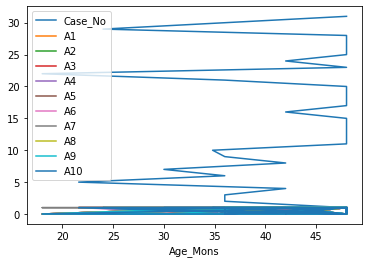

In [ ]:
lines = data.plot.line(x='Age_Mons')

In [ ]:
from sdv.tabular import GaussianCopula

model = GaussianCopula()
model.fit(data)


In [ ]:
new_data = model.sample(num_rows=40)

In [ ]:
new_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,6,0,0,0,0,1,1,0,0,0,0,41.9,f,no,no,clinician
1,16,0,0,1,0,0,0,0,0,0,0,36.3,f,No,No,Parent
2,4,0,0,1,0,0,1,1,0,0,1,37.4,m,no,No,medical staff
3,11,1,0,1,0,0,1,1,0,1,1,33.2,f,no,yes,caregiver
4,5,1,0,1,1,1,1,0,0,0,0,42.4,m,no,no,caregiver


In [ ]:
new_data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,6,0,0,0,0,1,1,0,0,0,0,41.9,f,no,no,clinician
1,16,0,0,1,0,0,0,0,0,0,0,36.3,f,No,No,Parent
2,4,0,0,1,0,0,1,1,0,0,1,37.4,m,no,No,medical staff
3,11,1,0,1,0,0,1,1,0,1,1,33.2,f,no,yes,caregiver
4,5,1,0,1,1,1,1,0,0,0,0,42.4,m,no,no,caregiver
5,5,1,0,0,0,0,0,1,0,1,0,31.9,f,no,no,medical staff
6,3,0,0,1,1,1,0,1,1,0,0,45.1,m,No,no,caregiver
7,3,0,0,1,1,1,0,1,0,1,1,45.9,m,No,No,Clinician
8,27,0,1,0,1,1,0,0,1,1,1,44.8,m,No,no,caregiver
9,13,0,1,1,1,0,0,1,1,1,1,41.4,m,no,no,Clinician


Save and share the model

In [ ]:
model.save('my_model.pkl')

Load the model and generate new data

In [ ]:
loaded = GaussianCopula.load('my_model.pkl')
new_data = loaded.sample(40)

Download the model

In [ ]:
from google.colab import files
files.download("/content/my_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Specifying the Primary Key of the table






In [ ]:
data.Case_No.value_counts().max()

1

In [ ]:
new_data[new_data.Case_No == new_data.Case_No.value_counts().index[0]]

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
3,2,0,1,1,1,1,1,1,0,1,0,42.5,f,no,yes,caregiver
7,2,0,0,0,0,1,0,1,0,0,1,29.9,m,no,no,Parent
24,2,1,1,1,0,1,1,1,1,0,1,38.1,m,No,No,caregiver
29,2,1,0,1,0,0,1,1,1,1,1,34.0,m,yes,No,caregiver


In [ ]:
new_data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,27,1,1,1,0,0,1,0,1,1,0,39.4,m,No,No,Parent
1,9,1,1,1,1,1,1,1,1,1,1,43.3,m,no,No,Medical Staff
2,27,1,0,0,0,1,1,1,0,0,1,40.7,m,No,No,Parent
3,2,0,1,1,1,1,1,1,0,1,0,42.5,f,no,yes,caregiver
4,30,1,1,1,1,0,1,1,1,0,1,46.4,f,no,no,Clinician
5,12,0,0,0,0,1,1,1,0,0,1,41.9,f,no,no,Parent
6,16,1,0,0,0,1,0,0,0,0,1,29.7,m,no,no,Parent
7,2,0,0,0,0,1,0,1,0,0,1,29.9,m,no,no,Parent
8,6,1,0,0,0,1,1,1,0,0,1,21.1,f,NaN,no,Clinician
9,19,0,0,0,0,1,0,1,0,0,1,37.1,f,no,No,clinician


As a result, the model will learn that this column must be unique and generate a unique sequence of values for the column:

In [ ]:
model = GaussianCopula(
    primary_key='Case_No'
)
model.fit(data)
new_data = model.sample(40)
new_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,1,0,1,1,1,1,1,0,1,0,45.4,m,No,no,caregiver
1,1,0,0,0,1,1,0,0,0,0,0,46.2,m,No,no,caregiver
2,2,0,1,1,1,1,1,0,1,1,0,43.5,f,No,No,Parent
3,3,1,1,1,1,1,1,1,1,1,0,38.3,f,No,No,caregiver
4,4,1,1,0,1,1,1,0,1,1,0,45.8,f,no,No,Parent


In [ ]:
new_data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,1,0,1,1,1,1,1,0,1,0,45.4,m,No,no,caregiver
1,1,0,0,0,1,1,0,0,0,0,0,46.2,m,No,no,caregiver
2,2,0,1,1,1,1,1,0,1,1,0,43.5,f,No,No,Parent
3,3,1,1,1,1,1,1,1,1,1,0,38.3,f,No,No,caregiver
4,4,1,1,0,1,1,1,0,1,1,0,45.8,f,no,No,Parent
5,5,1,1,0,0,0,1,0,1,1,1,38.3,m,No,no,Clinician
6,6,0,1,0,1,1,1,1,1,1,0,46.2,m,No,No,caregiver
7,7,1,1,0,0,0,1,1,0,1,1,39.0,f,no,no,clinician
8,8,1,0,0,0,0,0,1,0,0,0,45.5,m,no,No,Clinician
9,9,0,0,1,0,0,1,0,0,1,0,44.7,f,NaN,no,Parent


In [ ]:
from google.colab import files

new_data.to_csv('df1.csv')
files.download('df1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = GaussianCopula(
    primary_key='Case_No'
)
model.fit(data)
distributions = model.get_distributions()

In [ ]:
distributions

{'A1.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'A2.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'A3.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'A4.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'A5.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'A6.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'A7.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'A8.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'A9.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'A10.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Age_Mons.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Sex.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Jaundice.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Family_mem_with_ASD.value': 'copulas.univariate.

In [ ]:
data.Age_Mons.value_counts()

48.0    16
36.0     6
42.0     4
21.6     1
30.0     1
34.8     1
18.0     1
24.0     1
Name: Age_Mons, dtype: int64

array([[<AxesSubplot:title={'center':'Case_No'}>,
        <AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>],
       [<AxesSubplot:title={'center':'A3'}>,
        <AxesSubplot:title={'center':'A4'}>,
        <AxesSubplot:title={'center':'A5'}>],
       [<AxesSubplot:title={'center':'A6'}>,
        <AxesSubplot:title={'center':'A7'}>,
        <AxesSubplot:title={'center':'A8'}>],
       [<AxesSubplot:title={'center':'A9'}>,
        <AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'Age_Mons'}>]], dtype=object)

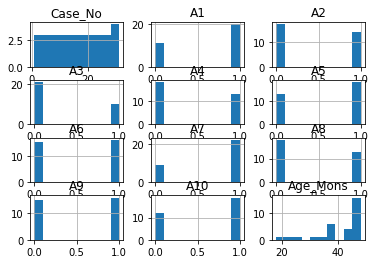

In [ ]:
data.hist()

array([[<AxesSubplot:title={'center':'Case_No'}>,
        <AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>],
       [<AxesSubplot:title={'center':'A4'}>,
        <AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>,
        <AxesSubplot:title={'center':'A7'}>],
       [<AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>,
        <AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'Age_mon'}>],
       [<AxesSubplot:title={'center':'Qchat-10-Score'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

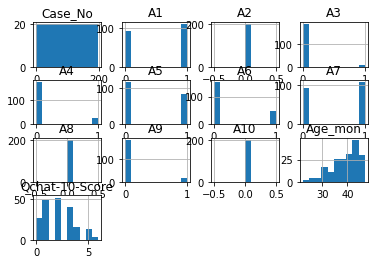

In [ ]:
new_data.hist()

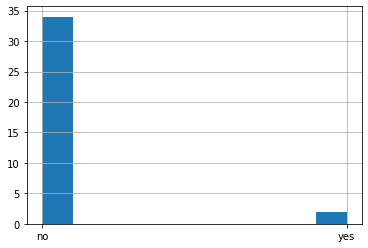

In [ ]:
data.Jaundice.hist();

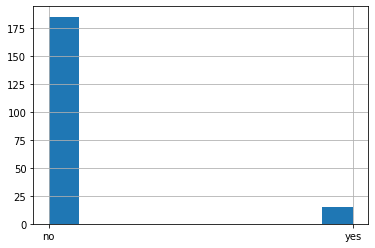

In [ ]:
new_data.Jaundice.hist();

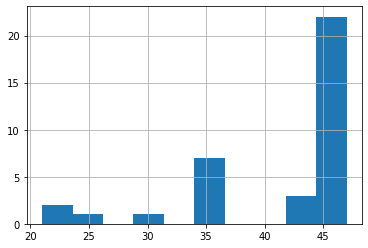

In [ ]:
data.Age_mon.hist();

In [ ]:
new_data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_mon,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,0,0,0,0,0,33.7,0,f,no,no,Parent,No
1,1,1,0,1,1,0,0,1,0,0,0,45.3,3,m,no,yes,Caregiver,No
2,2,1,0,0,0,0,0,1,0,0,0,43.6,2,f,no,no,Parent,No
3,3,1,0,0,0,1,1,1,0,0,0,38.6,5,f,no,no,Caregiver,No
4,4,1,0,0,0,1,0,1,0,0,0,40.2,2,m,no,yes,Parent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,1,0,0,0,1,0,1,0,0,0,34.7,3,f,no,no,Clinician,No
196,196,0,0,0,0,0,0,1,0,1,0,31.6,1,m,no,yes,Parent,No
197,197,1,0,0,1,1,0,1,0,0,0,42.0,5,m,no,yes,Caregiver,Yes
198,198,0,0,0,0,0,0,1,0,0,0,32.0,2,f,no,yes,Caregiver,No


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_No                 200 non-null    int64  
 1   A1                      200 non-null    int64  
 2   A2                      200 non-null    int64  
 3   A3                      200 non-null    int64  
 4   A4                      200 non-null    int64  
 5   A5                      200 non-null    int64  
 6   A6                      200 non-null    int64  
 7   A7                      200 non-null    int64  
 8   A8                      200 non-null    int64  
 9   A9                      200 non-null    int64  
 10  A10                     200 non-null    int64  
 11  Age_mon                 200 non-null    float64
 12  Qchat-10-Score          200 non-null    int64  
 13  Sex                     200 non-null    object 
 14  Jaundice                200 non-null    ob

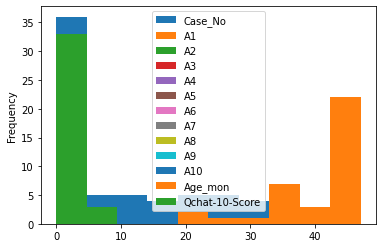

In [ ]:
#data.plot(kind='hist');
data.plot.hist();


In [ ]:
distributions['Age_mon.value']

'copulas.univariate.truncated_gaussian.TruncatedGaussian'

In [ ]:
new_data.Age_mon.value_counts()

44.8    5
38.3    4
41.9    4
46.7    4
35.9    3
       ..
40.4    1
36.9    1
27.0    1
42.6    1
45.8    1
Name: Age_mon, Length: 121, dtype: int64

Setting distributions for individual variables

In [ ]:
from sdv.tabular import GaussianCopula

model = GaussianCopula(
    primary_key='Case_No',
    #categorical_transformer='Class/ASD Traits',
    field_distributions={
        'Age_mon': 'gamma'
    }
)
model.fit(data)

In [ ]:
model.get_distributions()['Age_mon.value']

'copulas.univariate.gamma.GammaUnivariate'

In [ ]:
new_data = model.sample(len(data))
new_data.Age_mon.value_counts()

47.0    12
35.4     1
46.3     1
37.6     1
39.2     1
39.9     1
46.6     1
42.8     1
34.3     1
40.0     1
41.7     1
38.9     1
42.4     1
41.5     1
42.5     1
38.5     1
37.1     1
40.5     1
39.0     1
44.1     1
42.0     1
31.4     1
35.2     1
45.1     1
35.9     1
Name: Age_mon, dtype: int64

In [ ]:
new_data.Age_mon.hist();

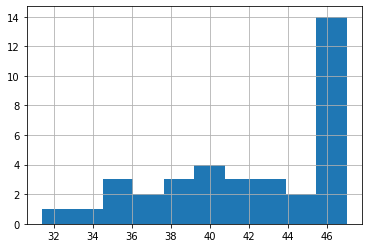

In [ ]:
new_data.Age_mon.hist();

In [ ]:
new_data.head()


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_mon,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,0,0,0,0,0,33.7,0,f,no,no,Parent,No
1,1,1,0,1,1,0,0,1,0,0,0,45.3,3,m,no,yes,Caregiver,No
2,2,1,0,0,0,0,0,1,0,0,0,43.6,2,f,no,no,Parent,No
3,3,1,0,0,0,1,1,1,0,0,0,38.6,5,f,no,no,Caregiver,No
4,4,1,0,0,0,1,0,1,0,0,0,40.2,2,m,no,yes,Parent,No


In [ ]:
new_data.describe


<bound method NDFrame.describe of     Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_mon  Qchat-10-Score  \
0         0   0   0   0   0   0   0   1   0   0    0     35.4               1   
1         1   1   0   0   0   1   1   1   0   0    0     42.5               3   
2         2   1   0   1   0   0   1   1   0   0    0     47.0               4   
3         3   0   0   0   0   0   0   0   0   0    0     47.0               0   
4         4   1   0   0   0   0   1   0   0   0    0     47.0               2   
5         5   1   0   0   0   1   0   1   0   0    0     45.1               6   
6         6   1   0   0   0   0   0   1   0   0    0     35.2               4   
7         7   1   0   0   0   0   0   0   0   0    0     31.4               2   
8         8   0   0   0   0   1   0   1   0   0    0     42.0               2   
9         9   1   0   0   0   1   0   0   0   0    0     44.1               1   
10       10   1   0   0   0   0   0   1   0   0    0     47.0              

In [ ]:
print(new_data.to_string())

    Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_mon  Qchat-10-Score Sex Jaundice Family_mem_with_ASD Who completed the test Class/ASD Traits 
0         0   0   0   0   0   0   0   1   0   0    0     35.4               1   m       no                  no              Clinician                No
1         1   1   0   0   0   1   1   1   0   0    0     42.5               3   f       no                  no              Caregiver                No
2         2   1   0   1   0   0   1   1   0   0    0     47.0               4   f       no                 yes              Caregiver                No
3         3   0   0   0   0   0   0   0   0   0    0     47.0               0   m       no                  no              Clinician                No
4         4   1   0   0   0   0   1   0   0   0    0     47.0               2   f       no                  no              Clinician                No
5         5   1   0   0   0   1   0   1   0   0    0     45.1               6   f      y

Generating 200 rows

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/data/Responses_Synthetic data.csv"
data1 = pd.read_csv(path)

# Dataset is now stored in a Pandas Dataframe

In [ ]:
data1

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,1,1,1,1,1,1,1,0,1,1,48.0,9,m,no,no,clinician,Yes
1,2,1,1,0,0,1,1,1,0,1,1,36.0,7,m,no,no,clinician,Yes
2,3,1,0,0,1,1,0,1,1,1,0,36.0,6,m,no,no,caregiver,Yes
3,4,1,1,0,1,1,1,1,1,1,0,42.0,8,m,no,no,caregiver,Yes
4,5,1,0,0,0,1,1,1,0,0,1,21.6,5,f,no,no,caregiver,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,1,1,1,0,0,0,1,1,0,0,48.0,5,f,No,no,clinician,Yes
141,142,1,1,1,0,1,1,1,0,1,1,48.0,8,m,no,no,Clinician,Yes
142,143,1,0,1,0,1,1,0,0,1,1,18.0,6,f,No,no,caregiver,Yes
143,144,1,0,0,1,1,0,0,0,0,1,48.0,4,m,No,no,Medical Staff,Yes


In [ ]:
from sdv.tabular import GaussianCopula

model = GaussianCopula()
model.fit(data1)


In [ ]:
new_data1 = model.sample(num_rows=200)

In [ ]:
new_data1

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,95,1,0,0,0,1,1,0,0,0,1,36.7,5,m,no,no,Clinician,Yes
1,49,1,0,0,1,1,0,0,0,1,0,34.3,4,f,no,No,Clinician,Yes
2,112,1,0,0,1,1,1,0,1,1,0,44.6,9,m,no,No,caregiver,Yes
3,80,1,0,0,0,0,0,1,0,0,1,38.7,7,m,Yes,No,caregiver,Yes
4,101,1,0,1,1,1,1,0,1,0,0,41.0,8,f,No,no,Parent,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,120,0,1,0,0,1,0,0,1,0,1,39.9,6,f,no,No,Clinician,Yes
196,127,1,0,0,0,1,1,0,0,0,1,46.5,4,f,No,no,caregiver,Yes
197,131,1,0,1,1,1,0,0,0,0,1,45.0,6,m,Yes,No,Medical Staff,Yes
198,95,0,1,0,0,1,0,0,0,0,0,43.0,3,m,no,No,caregiver,Yes


Save and share the model

In [ ]:
model.save('my_model1.pkl')

Load the model and generate new data

In [ ]:
loaded = GaussianCopula.load('my_model1.pkl')
new_data1 = loaded.sample(200)

Specifying the Primary Key of the table

In [ ]:
data.Case_No.value_counts().max()


1

In [ ]:
new_data1[new_data1.Case_No == new_data1.Case_No.value_counts().index[0]]


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
50,44,1,0,0,1,0,1,1,0,1,0,31.6,4,f,No,No,Medical Staff,Yes
87,44,0,0,1,0,0,0,1,0,1,0,43.4,3,m,No,no,Clinician,Yes
122,44,1,0,1,1,0,0,1,0,0,0,41.5,5,m,No,No,caregiver,Yes
132,44,0,0,0,0,1,0,1,0,0,0,39.3,1,f,No,No,Parent,Yes
173,44,1,0,1,1,0,0,0,1,1,1,47.2,6,m,No,Yes,caregiver,Yes


In [ ]:
new_data1

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,118,1,1,1,1,1,0,0,1,0,0,40.4,7,m,No,No,caregiver,Yes
1,121,0,0,1,1,1,1,0,0,0,0,30.4,5,f,No,no,caregiver,Yes
2,127,1,1,0,1,0,1,0,0,0,1,43.3,4,m,yes,no,clinician,Yes
3,82,1,0,0,0,1,1,0,0,1,1,39.5,5,f,no,no,Parent,Yes
4,80,1,1,0,1,0,0,0,0,1,1,43.7,7,m,no,no,Clinician,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,105,0,1,1,0,0,0,0,1,1,1,44.1,8,f,no,No,clinician,Yes
196,61,1,1,1,0,1,1,0,0,0,0,45.7,6,m,no,no,Clinician,Yes
197,118,1,0,0,0,1,0,1,0,0,1,46.1,3,m,no,no,caregiver,Yes
198,130,0,1,1,1,1,0,0,1,0,1,40.7,9,m,No,yes,caregiver,Yes


As a result, the model will learn that this column must be unique and generate a unique sequence of values for the column:

In [ ]:
model = GaussianCopula(
    primary_key='Case_No'
)
model.fit(data)
new_data1 = model.sample(200)
new_data1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,1,0,0,1,1,0,1,1,1,0,39.8,m,No,no,caregiver
1,1,1,0,0,0,0,1,1,1,1,1,39.9,f,no,No,Parent
2,2,1,0,0,1,1,1,0,1,1,0,45.5,f,no,No,Parent
3,3,1,1,1,0,0,1,0,0,0,1,37.0,m,No,no,Parent
4,4,1,0,1,0,0,1,1,1,0,0,41.5,f,no,No,caregiver


In [ ]:
new_data1

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,1,0,0,1,1,0,1,1,1,0,39.8,m,No,no,caregiver
1,1,1,0,0,0,0,1,1,1,1,1,39.9,f,no,No,Parent
2,2,1,0,0,1,1,1,0,1,1,0,45.5,f,no,No,Parent
3,3,1,1,1,0,0,1,0,0,0,1,37.0,m,No,no,Parent
4,4,1,0,1,0,0,1,1,1,0,0,41.5,f,no,No,caregiver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0,1,0,0,0,0,1,0,0,1,40.8,f,yes,No,Parent
196,196,1,1,1,1,1,1,1,1,1,0,45.1,m,No,No,Parent
197,197,0,1,1,0,0,1,1,1,1,0,39.6,m,no,no,Clinician
198,198,1,0,0,0,1,0,0,0,0,0,41.1,m,No,no,caregiver


Download synthetic data with 200 rows

In [ ]:
from google.colab import files

new_data1.to_csv('df1.csv')
files.download('df1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>